In [151]:
import torch
from PIL import Image

# 모델 로드
model1 = torch.hub.load('ultralytics/yolov5', 'custom', path='./models/main_5_3_15.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\SSAFY/.cache\torch\hub\master.zip
YOLOv5  2023-5-3 Python-3.11.2 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 Super with Max-Q Design, 8192MiB)



requirements: C:\Users\SSAFY\.cache\torch\hub\requirements.txt not found, check failed.


Fusing layers... 
total_YOLOv5l summary: 267 layers, 46167513 parameters, 0 gradients, 107.8 GFLOPs
Adding AutoShape... 


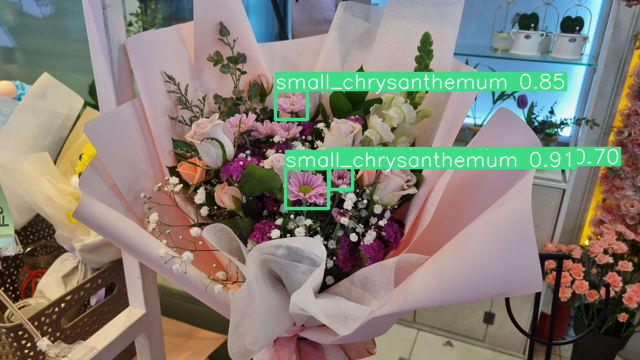

In [174]:

def result(image_path):
    img = Image.open(image_path)
    x, y = img.size
    L, M = max(x,y), min(x,y)
    if x == L:
        img = img.resize([640,int(640/L * M)])
    else:
        img = img.resize([int(640/L * M), 640])
    results = model1(img)
    if len(results.xywh[0]):
        
        xywhn_list = results.xywhn[0]
        del_idx = []
        for i in range(len(xywhn_list)-1):
            src = xywhn_list[i]
            for j in range(i+1, len(xywhn_list)):
                tar = xywhn_list[j]
                
                if abs(src[0] - tar[0]) <= 0.05 and abs(src[1] - tar[1]) <= 0.05:
                    if src[4] > tar[4]:
                        del_idx.append(j)
                    else:
                        del_idx.append(i)
            if src[4] < 0.3:
                del_idx.append(i)
        else:
            if xywhn_list[-1][4] < 0.3:
                del_idx.append(i+1)
            del_idx = sorted(list(set(del_idx)), reverse=True)
            for di in del_idx:
                if di == len(results.pred[0]):
                    results.pred[0] = results.pred[0][:di, :]
                else:
                    results.pred[0] = torch.cat((results.pred[0][:di, :], results.pred[0][di+1:, :]), dim=0)

    results.show()

image_path = './x_buquet/f1.jpg'
result(image_path)

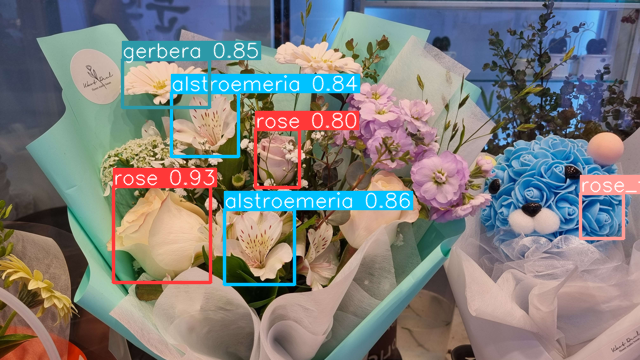

In [108]:
image_path = './x_buquet/f2.jpg'
result(image_path)

In [ ]:
import shutil, os

In [ ]:

cnt = 0
for i in os.listdir('./0_scrapping_img'):
    num = str(cnt).rjust(4,'0')
    name = f'rose_{num}.jpg'
    os.rename(f'./0_scrapping_img/{i}', f'./0_scrapping_img/{name}')
    cnt += 1

In [ ]:
import cv2

In [ ]:
import cv2
import numpy as np

# 이미지 파일을 읽기
image = cv2.imread('./0_scrapping_img/rose_0030.jpg')

image = cv2.resize(image, (640, 640))

# 이미지를 HSV 색 공간으로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 꽃 색상 범위 정의
lower_color = np.array([0, 0, 175])
upper_color = np.array([180, 120, 255])

# 색상 범위에 따른 마스크 생성
mask = cv2.inRange(hsv, lower_color, upper_color)

# 마스크에서 객체의 윤곽선 검출
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 윤곽선을 바탕으로 바운딩 박스 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 결과 이미지 표시
cv2.imshow('Result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()